In [1]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
import sys


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [2]:
from scipy import constants as const
from scipy.optimize import fsolve
from time import time
from scipy.stats import norm

In [3]:
Rs = 9.955e8 #[m]  
Ts = 5778.  
G = const.G
Ms = 1.9891e30
P= 2 * 0.1960797
def fM(K,P):
    Ms = 1.9891e30
    f = K**3 * 10**9 * P *24*3600/ (2*np.pi*const.G)/Ms
    return f

def M2(T):
    M2 = (T/5778.)**(4/2.5)
    #M2 = 0.26
    return M2

def mfunc(x,ink,K,P,T):
    f = fM(K,P)
    sinthird = np.sin(ink/180. *np.pi)**3
    return f*(1+M2(T)/x)**2 / sinthird - x
def M1new(ink,K,P,T):
    sol = fsolve(mfunc,7*np.ones(np.size(ink)),args = (ink,K,P,T))
    return sol

In [4]:
bayes_res = load_analysis_results("HSESRinner06_03.fits")

model cloned


In [5]:
ink_res = bayes_res.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl')
T2_res = bayes_res.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.T_sec')
K_res = np.random.normal(527,8,40000)
P_res = np.random.normal(2 * 0.1960797, 1.4e-6,40000)

In [6]:
start_time = time()
M1resnew = M1new(ink= ink_res[:40000], K=K_res,P=P_res,T=T2_res[:40000])
stop_time = time()
print (stop_time -start_time)
np.savetxt("M1resnew2.txt",M1resnew)

82229.9417009


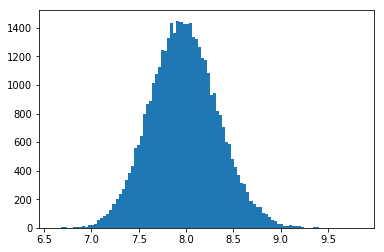

In [98]:
c,b,ba = plt.hist(M1resnew,bins = 100)

In [99]:
def scp(x,mu,std):
    return np.size(M1resnew)*(b[1]-b[0])*norm.pdf(x,mu,std)
    #return norm.pdf(x,mu,std)

7.977794772391496 0.3564801514680021


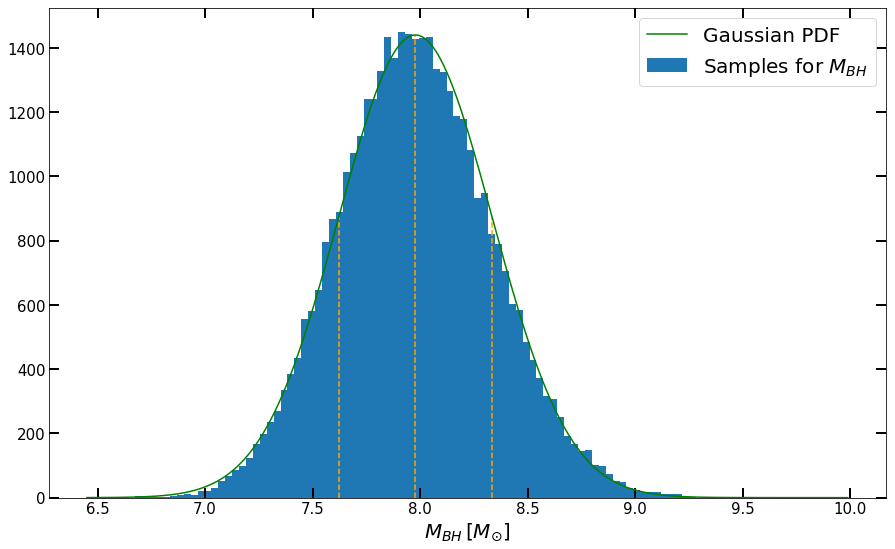

In [100]:
mu1,std1= norm.fit(M1resnew)
print mu1, std1
plt.figure(figsize = (15,9))
plt.hist(M1resnew,bins = 100,label = r"Samples for $M_{BH}$")
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,1000)
#p = np.size(M1res)*0.074120839*norm.pdf(x,mu,std)
p = scp(x,mu1,std1)
plt.plot([mu,mu],[0,scp(mu,mu1,std1)],"--",c = "orange")
plt.plot([mu-std,mu-std],[0,scp(mu-std,mu1,std1)],"--",c = "orange")
plt.plot([mu+std,mu+std],[0,scp(mu+std,mu1,std1)],"--",c = "orange")
plt.xlabel(r"$M_{BH}\, [M_{\odot}]$",fontsize = 20)
plt.plot(x,p,label = "Gaussian PDF",color  ="green")
plt.legend(fontsize = 20)
plt.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
#plt.savefig("Plots/Massresnew.pdf")
plt.show()

In [96]:
q = M2(T2_res)/M1resnew

In [97]:
norm.fit(q)

(0.0718982456656707, 0.003218981916863686)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 9.000e+00, 1.100e+01, 2.100e+01,
        1.900e+01, 3.400e+01, 3.400e+01, 5.100e+01, 6.300e+01, 1.050e+02,
        1.230e+02, 1.600e+02, 1.910e+02, 1.980e+02, 2.580e+02, 2.970e+02,
        3.660e+02, 4.460e+02, 4.690e+02, 5.660e+02, 5.730e+02, 6.920e+02,
        8.470e+02, 8.390e+02, 9.880e+02, 9.660e+02, 1.070e+03, 1.246e+03,
        1.222e+03, 1.211e+03, 1.363e+03, 1.332e+03, 1.400e+03, 1.455e+03,
        1.465e+03, 1.295e+03, 1.440e+03, 1.378e+03, 1.284e+03, 1.328e+03,
        1.200e+03, 1.129e+03, 1.132e+03, 1.035e+03, 9.800e+02, 8.590e+02,
        8.500e+02, 7.450e+02, 6.660e+02, 6.340e+02, 5.480e+02, 4.780e+02,
        4.440e+02, 3.670e+02, 3.290e+02, 2.680e+02, 2.260e+02, 2.310e+02,
        1.920e+02, 1.320e+02, 1.530e+02, 1.020e+02, 8.000e+01, 7.900e+01,
        7.200e+01, 5.100e+01, 3.900e+0

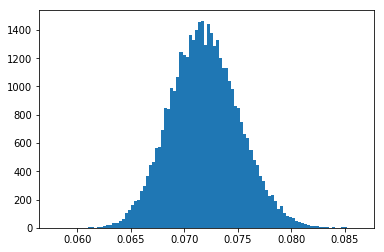

In [102]:
plt.hist(q,bins=100)

0.392